In [2]:
### Find all subgraphs isomorphic to pattern graph from give undirected graph
### Designed by Zhangzw
### March 2, 2018
import re
import networkx as nx
from numpy import *
import matplotlib.pyplot as plt
import itertools

In [3]:
### tell whether a str is a number or not
def is_number(str):
    try:
        float(str) if '.' in str else int(str)
        return True
    except ValueError:
        return False

In [4]:
### import graph files
def file2list(nodefile, edgefile):
    # processing nodes file
    frh = open(nodefile)
    filelines = frh.readlines()
    nodedict = {}
    for line in filelines:
        nodeinfo = line.split(',')
        if not is_number(nodeinfo[0]):
            continue
        nodeinfo[1] = re.sub('}[\n]*','',nodeinfo[1])
        #print(int(nodeinfo[0]),nodeinfo[1].split(':')[1])
        nodedict[int(nodeinfo[0])] = nodeinfo[1].split(':')[1]
    frh.close()

    # processing edges file
    frh = open(edgefile)
    filelines = frh.readlines()
    edgelist = []
    for line in filelines:
        edgeinfo = line.split(',')
        if not is_number(edgeinfo[0]):
            continue
        edgeinfo[1] = re.sub('[\n]*','',edgeinfo[1])
        #print(edgeinfo[0],edgeinfo[1])
        edgelist.append((int(edgeinfo[0]),int(edgeinfo[1])))
    frh.close()
    return nodedict, edgelist

In [5]:
### create graph from node and edge lists
def creategraph(nodedict,edgelist):
    graph = nx.Graph()
    for key in nodedict.keys():
        graph.add_node(key,label=nodedict[key])
        #print(graph.node[key])
    graph.add_edges_from(edgelist)
    return graph

In [6]:
### create subgraph from an original graph
def findisosubgraph(graph,patterngraph):
    num = len(list(patterngraph.nodes))
    print(num)
    isosubgraph_list = []
    subgraph_nodelist = itertools.combinations(graph.nodes, num)
    #subgraph_nodelist = list(set(subgraph_nodelist))
    print(subgraph_nodelist)
    # print(len(subgraph_nodelist))
    for subgraph_list in subgraph_nodelist:
        subgraph = graph.subgraph(subgraph_list)
        if len(list(subgraph.edges)) != len(list(patterngraph.edges)):
            continue
        print(list(subgraph.nodes),list(subgraph.edges),list(patterngraph.edges))
        if nx.is_isomorphic(subgraph,patterngraph):
            isosubgraph_list.append(list(subgraph.nodes))
    return isosubgraph_list

In [7]:
# create node and edge lists
g1_nodedict,g1_edgelist = file2list("toy_data_nodes.csv","toy_data_edges.csv")
print(g1_nodedict)
#print(g1_nodedict.keys())
print(g1_edgelist)

{0: 'a', 1: 'b', 2: 'c', 3: 'b', 4: 'c', 5: 'a', 6: 'b', 7: 'c', 8: 'c', 9: 'a', 10: 'c', 11: 'a', 12: 'b'}
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 6), (0, 8), (1, 2), (1, 10), (1, 9), (2, 11), (2, 12), (3, 4), (5, 6), (5, 7), (6, 7), (6, 8), (9, 10), (11, 12)]


{0: 'a', 1: 'b', 2: 'c'}
[(0, 1), (0, 2), (1, 2)]


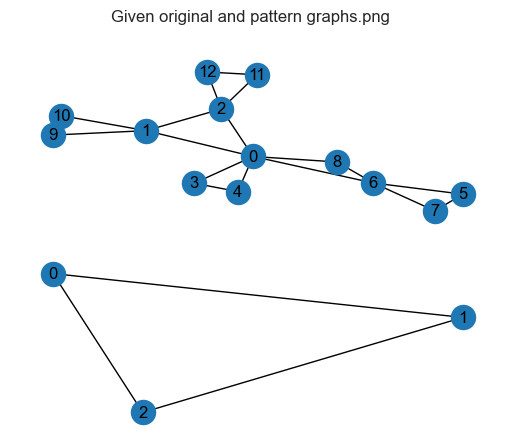

In [8]:
# create graphs
pg1_nodedict,pg1_edgelist = file2list("toy_pattern_nodes.csv","toy_pattern_edges.csv")
print(pg1_nodedict)
print(pg1_edgelist)
graph1 = creategraph(g1_nodedict,g1_edgelist)
plt.subplot(211)
nx.draw(graph1,with_labels=True)
pattern_graph1 = creategraph(pg1_nodedict,pg1_edgelist)
plt.subplot(212)
nx.draw(pattern_graph1,with_labels=True)
plt.suptitle("Given original and pattern graphs.png")
plt.savefig("original and pattern graphs.png")
plt.show()

In [9]:
# create subgraphs and find isomorphmic subgraphs
isosubgraph_list = findisosubgraph(graph1, pattern_graph1)
print(isosubgraph_list)

3
[0, 1, 2] [(0, 1), (0, 2), (1, 2)] [(0, 1), (0, 2), (1, 2)]
[0, 3, 4] [(0, 3), (0, 4), (3, 4)] [(0, 1), (0, 2), (1, 2)]
[0, 8, 6] [(0, 6), (0, 8), (8, 6)] [(0, 1), (0, 2), (1, 2)]
[1, 10, 9] [(1, 10), (1, 9), (10, 9)] [(0, 1), (0, 2), (1, 2)]
[2, 11, 12] [(2, 11), (2, 12), (11, 12)] [(0, 1), (0, 2), (1, 2)]
[5, 6, 7] [(5, 6), (5, 7), (6, 7)] [(0, 1), (0, 2), (1, 2)]
[[0, 1, 2], [0, 3, 4], [0, 8, 6], [1, 10, 9], [2, 11, 12], [5, 6, 7]]


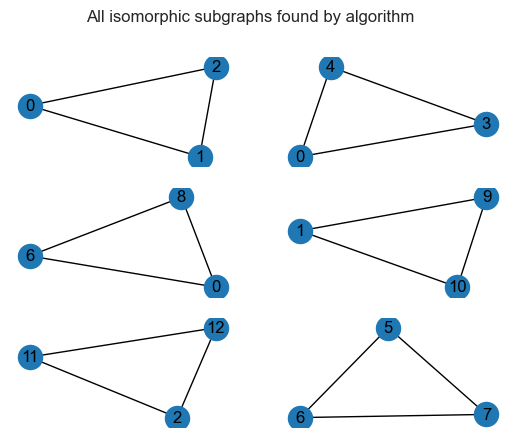

In [10]:
# draw grid diagrams
total = len(isosubgraph_list)
for idx in range(total):
    #plt.subplot(eval('(total/2)*100+2*10+idx+1'))
    plt.subplot(int((total/2)*100+2*10+idx+1))
    nx.draw(graph1.subgraph(isosubgraph_list[idx]), with_labels=True)
plt.suptitle("All isomorphic subgraphs found by algorithm")
plt.savefig("isomorphic graphs.png")
plt.show()